# 단변량분석_숫자형변수

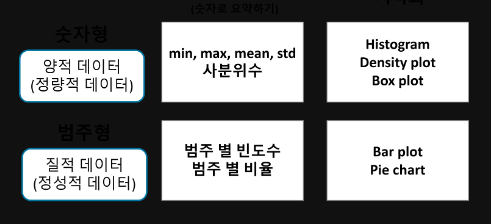

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# titanic 데이터 불러오기
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'
titanic = pd.read_csv(path)
titanic.head()

In [ ]:
# airquality 데이터 불러오기
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv'
air = pd.read_csv(path)
air.head()

# 1. 숫자형 변수

### 1) 수치화: 대표값
    - 평균: a.mean()
    - 중앙값: a.median()
    - 최빈값: a.mode()

**평균**

In [ ]:
# 넘파이 함수 이용하기
np.mean(titanic['Fare'])

In [ ]:
# 판다스의 mean 메서드 이용하기
titanic['Fare'].mean()

**중앙값**

In [ ]:
# 넘파이 함수 이용하기
np.median(titanic['Fare'])

In [ ]:
# 판다스의 median 메서드 이용하기
titanic['Fare'].median()

**최빈값**

In [ ]:
# 판다스 메서드 이용하기
titanic['Pclass'].mode()

$ $

### 2) 수치화: 기초통계량

In [ ]:
# 시리즈.describe()
titanic['Fare'].describe()

In [ ]:
titanic[['Fare']].describe().T  # df 형식으로 바꾸고, 전치행렬

In [ ]:
titanic['Fare']   # 결과는 시리즈값으로 출력
titanic[['Fare']]  # 리스트로 집어넣어 결과는 df으로 출력

In [ ]:
# df.describe()
titanic.describe()

$ $

### 3) 시각화

##### **히스토그램**

In [ ]:
# 히스토그램
plt.hist(titanic.Fare, bins = 5, edgecolor = 'gray')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 히스토그램 bins=30으로 조정
plt.hist(titanic.Fare, bins = 30, edgecolor = 'gray')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# seaborn 함수는 x축 y축 라벨을 기본값으로 가짐으로 plt보다 더 편하게 표현 가능

sns.histplot(x= 'Fare', data = titanic, bins = 20)
plt.show()

In [ ]:
# 연습 1
# titanic의 Age에 칼럼에 대해 히스토그램을 그려 봅시다.
# bins = 8, 16, 32, 64

plt.figure(figsize=(5,3))
plt.subplot(2, 2, 1)
plt.hist(titanic['Age'],bins=8)

plt.subplot(2, 2, 2)
plt.hist(titanic['Age'],bins=16)

plt.subplot(2, 2, 3)
plt.hist(titanic['Age'],bins=32)

plt.subplot(2, 2, 4)
plt.hist(titanic['Age'],bins=64)

plt.show()

In [ ]:
# 연습 2
bin = [8, 16, 32, 64]

for i, v in enumerate(bin):
    plt.subplot(2,2,i+1)
    sns.histplot(x='Age', data=titanic, bins=v)
    plt.title(f'bins = {v}')
    
plt.show()    


##### 확률밀도함수

In [ ]:
# 밀도함수 그래프 그리기
sns.kdeplot(titanic['Fare'])
# sns.kdeplot(x='Fare', data = titanic)

plt.show()

In [ ]:
sns.histplot(x='Age', data=titanic, kde=True)
plt.show()

##### boxplot
    -NaN이 있으면 상자그림이 그려지지 않음.
    -옆으로 그리기 plt.plot( , vert=False)

In [ ]:
# titanic['Age']에는 NaN값이 존재. 
Age_N = titanic.loc[titanic['Age'].notnull()]

In [ ]:
plt.boxplot(Age_N['Age'])
plt.grid()
plt.show()

In [ ]:
# 수평으로 그리기 vert=False
plt.boxplot(Age_N['Age'], vert = False)
plt.grid()
plt.show()

In [ ]:
# seaborn 패키지 함수들은 NaN값을 알아서 빼줌
sns.boxplot(x = titanic['Age'])
plt.grid()
plt.show()

In [ ]:
# 수평으로 그리고 싶을 때는 x=가 아닌 y= 옵션
sns.boxplot(y = titanic['Age'])
plt.grid()
plt.show()

##### 시계열 데이터 시각화

In [ ]:
air['Date'] = pd.to_datetime(air['Date']) # 날짜 형식으로 변환

plt.plot('Date', 'Ozone', 'g-', data = air, label = 'Ozone')
plt.plot('Date', 'Temp', 'r-', data = air, label = 'Temp')

plt.xlabel('Date')
plt.legend()

$ $

$ $

# 2. 범주형 변수

### 1) 수치화: 기초통계량


##### 범주별 빈도수
    - .value_counts(): 범주 별 개수를 count

In [ ]:
# value_counts()
titanic['Embarked'].value_counts()

##### 범주별 비율

In [ ]:
# 전체 데이터 건수 : .shape의 첫번째 값([0])
print(titanic.shape)
print(titanic.shape[0])

In [ ]:
# 범주별 빈도수 / 전체 데이터 건수
titanic['Pclass'].value_counts()/titanic.shape[0]

$ $

### 2) 시각화

##### bar chart
    - sns.countplot(x='', data=)

In [ ]:
sns.countplot(x='Pclass', data=titanic)
plt.grid()
plt.show()

##### pie chart
    - plt.pie( 값, labels=범주이름, autopct = ‘%.2f%%’)

In [ ]:
# 파이차트 기본
temp = titanic['Pclass'].value_counts()

plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%')
plt.show()

In [ ]:
# 파이차트 각도 방향 조정
#  startangle = 90 : 90도 부터 시작
#  counterclock = False : 시계 방향으로
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%', 
        startangle=90, counterclock=False)
plt.show()

In [ ]:
# 간격 띄우고, 그림자 넣기
# explode = [0.05, 0.05,0.05] : 중심으로 부터 1,2,3 을 얼마만큼 띄울지
# shadow = True : 그림자 추가
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%', 
        startangle=90, counterclock=False, 
        explode = [0.05, 0.05, 0.05], shadow=True)
plt.show()

$ $

$ $

# 연습문제: boston

In [ ]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv')
boston.head()

### 1) 숫자형 변수

In [ ]:
# 숫자형 변수 medv(집값)

# medv 기초통계량 
boston[['medv']].describe().T  


In [ ]:
# 히스토그램 + 상자그림
plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
sns.histplot(boston['medv'], bins=30, kde=True)
plt.grid()

plt.subplot(2,1,2)
sns.boxplot(x = boston['medv'])
plt.grid()

plt.show()

In [ ]:
##### 단변량 분석 코드를 함수로 만들기.
def eda_1_n(data, var, bins = 30) :
    # 기초 통계량
    display(data[[var]].describe().T)

    # 시각화
    plt.figure(figsize = (12,8))
    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()
    plt.show()

In [ ]:
var = 'crim'
eda_1_n(boston, var)

$ $

### 2) 범주형 변수

In [ ]:
var = 'chas'

In [ ]:
# 기초통계량
display(boston[var].value_counts())
print('-'*30)
print(boston[var].value_counts()/boston.shape[0])

In [ ]:
# 기초통계량
cnt = boston[var].value_counts()
ratio = boston[var].value_counts()/boston.shape[0]

pd.DataFrame({'Class':cnt.index,  'Count': cnt, 'ratio':ratio})

In [ ]:
# 시각화
sns.countplot(x = boston[var])
plt.grid()
plt.show()

In [ ]:
######### 함수 만들기
def eda_1_c(data, var) :
    # 기초 통계량
    # 기초통계량
    cnt = boston[var].value_counts()
    ratio = boston[var].value_counts()/boston.shape[0]
    display(pd.DataFrame({'Class':cnt.index,  'Count': cnt, 'ratio':ratio}))

    # 시각화
    sns.countplot(x = boston[var])
    plt.grid()
    plt.show()

In [ ]:
eda_1_c(boston, var)